<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/Chap3_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#주택 가격 예측 : 회귀문제

#입력데이터에 있는 각 특성은 스케일이 서로 다름. 어떤 값은 0~1사이, 1~12사이, 1~100 등 다양함 

from keras.datasets import boston_housing 

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
#데이터 정규화 <- 상이한 스케일의 데이터를 다루기 위해
mean = train_data.mean(axis=0)
train_data -=mean

std=train_data.std(axis=0)
train_data /=std

test_data -=mean
test_data /=std

In [0]:
# 모델 정의하기
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu',
                        input_shape= (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer= 'rmsprop',
               loss='mse',
               metrics=['mae'])
  return model

In [7]:
#k-fold cross-validation
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print("처리 중인 fold #", i)
  val_data = train_data[i * num_val_samples: (i+1) *num_val_samples]
  val_targets = train_targets[i*num_val_samples : (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                                           train_data[(i+1) *num_val_samples:]],
                                                           axis=0)
  
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                                           train_targets[(i+1) *num_val_samples:]],
                                                           axis=0)
  
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
           epochs=num_epochs, batch_size=1, verbose=0) #verbose =0 : 훈련과정 출력하지 않음
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mse)

처리 중인 fold # 0
처리 중인 fold # 1
처리 중인 fold # 2
처리 중인 fold # 3


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [9]:
all_scores

[8.496084420987875, 8.70509929468136, 18.21902579600268, 11.459586278046713]

In [10]:
np.mean(all_scores)

11.719948947429657

In [11]:
#k-fold cross-validation epoch = 500

num_epochs = 500
all_mae_histories = []

for i in range(k):
  print("처리 중인 fold #", i)
  val_data = train_data[i * num_val_samples: (i+1) *num_val_samples]
  val_targets = train_targets[i*num_val_samples : (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                                           train_data[(i+1) *num_val_samples:]],
                                                           axis=0)
  
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                                           train_targets[(i+1) *num_val_samples:]],
                                                           axis=0)
  
  
  model = build_model()
  history= model.fit(partial_train_data, partial_train_targets,
            validation_data = (val_data,val_targets),
           epochs=num_epochs, batch_size=1, verbose=0) #verbose =0 : 훈련과정 출력하지 않음
  
  mae_history =history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

처리 중인 fold # 0
처리 중인 fold # 1
처리 중인 fold # 2
처리 중인 fold # 3


In [0]:
average_mae_history=[
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

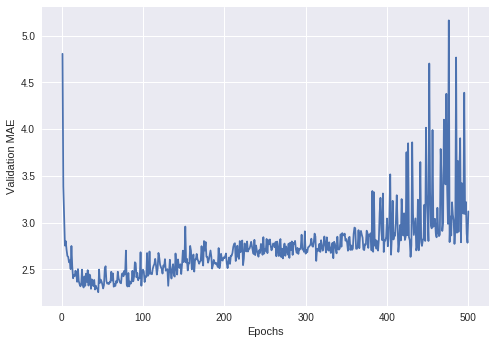

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
#처음 10개의 데이터 포인트를 제외한 검증 점수 그리기

def smooth_curve(points, factors=0):
  smoothed_points= []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factors + point * (1-factors))
    else:
      smoothed_points.append(point)
  
  return smoothed_points

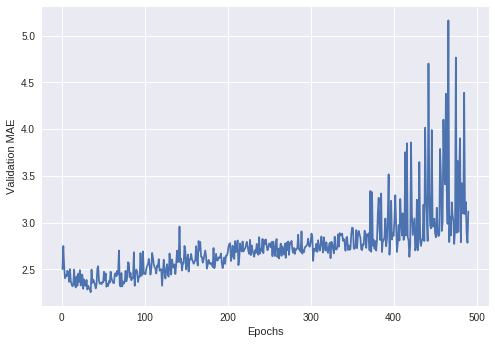

In [15]:
smooth_mae_history =smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
#최종 모델 훈련
model = build_model()

model.fit(train_data, train_targets,
          epochs= 80, batch_size = 16, verbose =0 )
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [17]:
test_mae_score

2.697855182722503